In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


In [3]:
print("Shape of Training Set", X_train.shape)
print("Shape of Test Set", X_test.shape)

Shape of Training Set (50000, 32, 32, 3)
Shape of Test Set (10000, 32, 32, 3)


In [4]:
print("Shape of Training Labels ", y_train.shape)
print("Shape of Test Labels ", y_test.shape)

Shape of Training Labels  (50000, 1)
Shape of Test Labels  (10000, 1)


In [8]:
y_train[500:505]

array([[5],
       [8],
       [2],
       [8],
       [0]], dtype=uint8)

In [10]:
y_train = y_train.reshape(-1,)
y_train[500:505]

array([5, 8, 2, 8, 0], dtype=uint8)

In [12]:
y_test = y_test.reshape(-1,)

In [13]:
classes = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

In [18]:
def plot_img(X,y, ind):
  plt.figure(figsize=(10,1))
  plt.imshow(X[ind])
  plt.xlabel(classes[y[ind]])

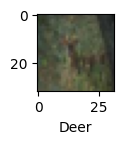

In [19]:
plot_img(X_train, y_train, 10)

In [20]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [22]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
ann. compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
ann.fit(X_train, y_train, epochs=100)

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3057 - loss: 1.9325
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4198 - loss: 1.6391
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4543 - loss: 1.5479
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.4745 - loss: 1.4874
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.4969 - loss: 1.4302
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5074 - loss: 1.4002
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5271 - loss: 1.3508
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5370 - loss: 1.3089
Epoch 9/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.5478 - loss: 1.2830
Epoch 10/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5637 - loss: 1.2509
Epoch 11/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5707 - loss: 1.2199
Epoch 12/100
15

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [27]:
y_pred = ann.predict(X_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1.6597384e-06, 9.3140017e-07, 6.0957717e-04, ..., 1.6764722e-10,
        7.4526797e-05, 1.2084803e-05],
       [4.0537252e-08, 4.5000394e-05, 8.8565608e-09, ..., 2.3696174e-09,
        9.9979526e-01, 1.5974563e-04],
       [6.5962118e-01, 5.0721448e-03, 1.6965378e-04, ..., 1.7338730e-03,
        3.1366250e-01, 1.9736428e-02],
       ...,
       [1.0302517e-05, 1.8727079e-08, 4.1054673e-02, ..., 4.8206130e-04,
        1.6374116e-04, 1.0518046e-05],
       [1.7808630e-03, 1.9982980e-04, 2.5047487e-01, ..., 3.9226055e-05,
        2.6541866e-06, 2.3834875e-06],
       [7.7875001e-08, 1.0609009e-06, 1.7226653e-02, ..., 8.9965838e-01,
        7.7433560e-06, 5.1531811e-06]], dtype=float32)

In [28]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([3, 8, 0, ..., 5, 6, 7])

In [29]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.5841

In [30]:
accuracy_train = ann.evaluate(X_train, y_train)
accuracy_train

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9999 - loss: 0.0090


[0.009313741698861122, 0.9998199939727783]

As we can see the accuracy for the 'ann' model on the Training Set is above 99% but on Testing Set it is is limits only upto 58%. It clearly means that the model is Overfitting

In [31]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.66      0.68      0.67      1000\n           1       0.69      0.68      0.68      1000\n           2       0.49      0.47      0.48      1000\n           3       0.41      0.38      0.39      1000\n           4       0.51      0.51      0.51      1000\n           5       0.50      0.48      0.49      1000\n           6       0.59      0.68      0.64      1000\n           7       0.68      0.63      0.65      1000\n           8       0.69      0.73      0.71      1000\n           9       0.61      0.60      0.61      1000\n\n    accuracy                           0.58     10000\n   macro avg       0.58      0.58      0.58     10000\nweighted avg       0.58      0.58      0.58     10000\n'

***Building A Convolutional Neural Network Model to train the images***

In [33]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [37]:
cnn.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.3782 - loss: 1.6945
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5933 - loss: 1.1489
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6566 - loss: 0.9841
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6917 - loss: 0.8886
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7174 - loss: 0.8120
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7429 - loss: 0.7478
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7618 - loss: 0.6830
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7787 - loss: 0.6449
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7864 - loss: 0.6136
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8041 - loss: 0.5640
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8170 - loss: 0.5301
Epoch 12/20
1563/1563 ━━━━━━━━

In [38]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6998 - loss: 1.2398


[1.2906209230422974, 0.6919999718666077]

Training the 'cnn' model for more epochs to observer the change in the Test Accuracy

In [39]:
cnn.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9105 - loss: 0.2550
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9140 - loss: 0.2424
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9272 - loss: 0.2111
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9281 - loss: 0.2012
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9340 - loss: 0.1875
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9338 - loss: 0.1831
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9407 - loss: 0.1663
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9463 - loss: 0.1530
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9469 - loss: 0.1485
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9493 - loss: 0.1400
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9523 - loss: 0.1348
Epoch 12/20
1563/1563 ━━━━━━

In [43]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6711 - loss: 2.6206


[2.6671488285064697, 0.6714000105857849]

The Model is still Overfitting. Applying Data Augmentation

In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [46]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [49]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [53]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    epochs=50,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 43ms/step - accuracy: 0.6104 - loss: 1.1277 - val_accuracy: 0.6936 - val_loss: 0.8839
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.6185 - loss: 1.1038 - val_accuracy: 0.6889 - val_loss: 0.9028
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.6229 - loss: 1.1048 - val_accuracy: 0.6990 - val_loss: 0.8796
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.6275 - loss: 1.0972 - val_accuracy: 0.6837 - val_loss: 0.9187
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.6227 - loss: 1.1113 - val_accuracy: 0.6993 - val_loss: 0.8843
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 40ms/step - accuracy: 0.6257 - loss: 1.0997 - val_accuracy: 0.7162 - val_loss: 0.8341
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.6300 - loss: 1.0837 - val_accuracy: 0.7102 - val_loss: 0.8507
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.6349 - loss: 1.0724 - 

In [54]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7184 - loss: 0.8074


[0.809868574142456, 0.717199981212616]

In [55]:
model.evaluate(X_train, y_train)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7280 - loss: 0.7614


[0.7652217745780945, 0.7277600169181824]

***Using Data Augmentation the accuracies for Training Set and Testing Set are similar***

In [57]:
ann.save('ann_model.h5')

In [58]:
cnn.save('cnn_model.h5')

In [59]:
model.save('cnn_augmented_model.h5')

In [60]:
from google.colab import files
files.download('ann_model.h5')
files.download('cnn_model.h5')
files.download('cnn_augmented_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>